### Important variables 

Deptext = Depression text-response <br> 
Wortext = Worry text-response

dep_all_phraces = Depression all phraces responses <br> 
wor_all_phraces = Worry all phraces responses

dep_all_word = Depression all descriptive word responses <br>
wor_all_words = Worry all descriptive word responses

dep_all_selected1 = All selected depression word responses <br>
wor_all_selected1 = All selected worry word responses

<hr style="border:1px solid gray"> </hr>

CESDtot = Center for Epidemiological Studies Depression (CESD) <br>
PHQtot = PHQ-9 = Patient Helath Questionnaire = a depression scale

GADtot = GAD-7 = Generalized anxiety disorder scale <br>
PSWQtot = Penn State Worry Questionniare 

<hr style="border:1px solid gray"> </hr>

miniGAD_diagnose = Self-reported MINI (structured interview) GAD diangose <br>
minidep_diagnose = Self-reported MINI (structured interview) MDD (depression) diangose

# Importing and cleaning dataset

In [12]:
import math
import numpy as np
import os
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt

In [13]:
#Get relative directory to find path
path = os.path.join(os.getcwd(), 'data', 'response_format_cleaned_ds1.csv')
responses = pd.read_csv(path, sep=';', header=0)
responses.drop(responses.columns[[0]], axis=1, inplace=True)
print(len(responses))

976


# Statistics of GAD values in dataset

In [11]:
responses[['GADtot']].describe()

,GADtot
count,963.000000
mean,10.099688
std,6.272604
min,0.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,21.000000


In [2]:
# Drop rows with NA values in 'dep_all_words' column
responses = responses[~responses.wor_all_words.str.contains("NA NA NA NA NA")]
responses = responses[~responses.wor_all_selected1.str.contains("NA NA NA NA NA")]
responses = responses[~responses.wor_all_phraces.str.contains("NA NA NA NA NA")]
responses = responses.reset_index(drop=True)
responses.dropna(subset=['Wortext'], inplace=True)
responses = responses.reset_index(drop=True)

responses

976


,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,sequence1,seqOne,Dep5words[Word1],...,wor_all_selected,wor_all_selected1,minidep_scale,minidep_diagnose,depression_episodes,miniGAD_scale,miniGAD_symptoms_scale,miniGAD_diagnose,minidiagnose_category,minidiagnose_category_number
0,434.0,2020-08-07 11:46:22,15.0,en,6.593644e+08,2020-08-07 11:38:22,2020-08-07 11:46:22,2.0,1.0,motivated,...,NA NA happy NA NA NA NA NA NA NA NA NA NA care...,happy carefree satisfied ...,0.0,0,0,0,0,0,NoDi,0
1,184.0,2020-08-07 11:58:36,15.0,en,2.803892e+08,2020-08-07 11:34:31,2020-08-07 11:58:36,2.0,1.0,connected,...,anxious NA NA NA NA NA NA NA NA NA NA tense NA...,anxious tense fearful sad fe...,3.0,0,0,8,5,0,NoDi,0
2,330.0,2020-08-07 11:51:54,15.0,en,6.770686e+07,2020-08-07 11:36:32,2020-08-07 11:51:54,1.0,1.0,Yes,...,anxious NA NA NA NA NA worried NA NA NA NA NA ...,anxious worried scared sad mon...,7.0,0,5,9,5,0,NoDi,0
3,630.0,2020-08-07 13:22:42,15.0,en,1.176643e+09,2020-08-07 12:55:26,2020-08-07 13:22:42,3.0,1.0,minor,...,anxious NA NA NA NA concerned NA NA NA NA NA t...,anxious concerned tense scared ...,3.0,0,5,8,5,0,NoDi,0
4,400.0,2020-08-07 12:04:52,15.0,en,1.012492e+09,2020-08-07 11:37:19,2020-08-07 12:04:52,1.0,1.0,family,...,NA NA NA NA NA concerned NA NA NA NA NA tense ...,concerned tense sad tired ...,4.0,0,2,7,4,1,GAD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,32.0,2020-08-07 12:02:58,15.0,en,1.363161e+09,2020-08-07 11:45:11,2020-08-07 12:02:58,3.0,1.0,Worried,...,anxious NA NA NA NA NA NA NA NA NA NA NA scare...,anxious scared uneasy fearful ...,9.0,1,1,0,0,0,Dep,1
952,344.0,2020-08-07 13:45:57,15.0,en,1.283747e+08,2020-08-07 13:32:04,2020-08-07 13:45:57,3.0,1.0,Tired,...,NA NA NA nervous NA NA worried NA NA NA NA NA ...,nervous worried stress anxie...,7.0,1,7,11,6,1,BOTH,3
953,297.0,2020-08-07 13:11:46,15.0,en,9.695994e+08,2020-08-07 12:52:04,2020-08-07 13:11:46,3.0,1.0,Unsettled,...,NA NA NA NA NA NA NA NA stressed NA NA NA scar...,stressed scared fearful anxi...,7.0,1,2,10,5,1,BOTH,3
954,241.0,2020-08-07 12:51:07,15.0,en,1.976520e+09,2020-08-07 12:28:54,2020-08-07 12:51:07,2.0,1.0,Despair,...,anxious NA NA NA NA NA worried NA stressed NA ...,anxious worried stressed uneasy ...,8.0,1,1,11,6,1,BOTH,3


In [14]:
def reclass_scale(num_array):
    def new_class(num):
        if 0 <= num <= 5: return 0
        elif 6 <= num <= 10: return 1 
        elif 11 <= num <= 15: return 2
        else: return 3
        
    return np.array([new_class(x) for x in num_array])

In [15]:
responses['GAD_class'] = reclass_scale(responses.GADtot.values)

### Dataset distribution for different classes of PHQ9 scale

In [16]:
print("Count responses with/without diagnosed anxiety:\n",responses.GAD_class.value_counts())
#print("\nCount responses with/without diagnosed anxiety:\n",responses.miniGAD_diagnose.value_counts())

Count responses with/without diagnosed anxiety:
 2    262
0    260
3    229
1    225
Name: GAD_class, dtype: int64


## Importing and cleaning semantic space 

In [17]:
"""
Using 5-gram contexts from the database, a co-occurrence (word by word) matrix was set up, 
where the rows contained the 120,000 most common words in the n-gram database and the columns 
consisted of the 10,000 most common words in the n-gram database.

The variable 'space' is a matrix of the semantic space with dimentions reduced to 512.
"""
path = os.path.join(os.getcwd(), 'data', 'spaceEnglish1.csv')
space = pd.read_csv(path, encoding= 'unicode_escape')
space.set_index('words', inplace=True)
space.drop(space.columns[[0]], axis=1, inplace=True)
space.dropna(inplace=True)
space = space[~space.index.duplicated(keep='first')]

In [21]:
space.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512
words,,,,,,,,,,,,,,,,,,,,,
was,-0.234071,-0.278211,-0.100658,-0.269570,-0.115498,-0.000038,-0.036835,0.024037,-0.003974,0.006582,...,-0.011414,0.018075,-0.020312,0.001287,0.024483,0.012867,0.021265,0.016368,0.024858,-0.020382
not,-0.283230,-0.338776,-0.141085,-0.243715,-0.236692,-0.033354,-0.099906,0.053253,-0.025582,-0.040372,...,-0.028472,0.048824,-0.025452,0.007828,0.027658,-0.022135,0.023037,0.005371,-0.001482,-0.024063
by,-0.251058,-0.327183,-0.203889,-0.283337,-0.124522,-0.006537,0.015371,0.131667,-0.130597,0.055605,...,-0.001550,0.027915,-0.012646,-0.005019,0.075544,0.014663,0.013489,-0.022636,0.010127,-0.027951
that,-0.281888,-0.346746,-0.171006,-0.266698,-0.208917,-0.019832,-0.035404,0.044301,-0.076601,0.021328,...,0.019319,0.042742,0.001747,0.019198,0.022598,0.034352,0.033282,-0.006843,0.027052,-0.013623
of,-0.256530,-0.335434,-0.229791,-0.256070,-0.120020,0.017080,0.078004,0.112134,-0.073805,0.098183,...,0.012012,0.005470,-0.022383,-0.042172,-0.003430,-0.013435,0.003697,-0.022769,0.024873,0.010061


### Methods for cleaning and aggregating semantic responses

In [22]:
"""
Cleans the string from punctuations and removes all words which are not represented in the semantic space. 
"""
words_in_space = set(space.index.values)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        try:
            tokens = word_tokenize(text)
            words = [lemmatizer.lemmatize(w.lower()) for w in tokens if w.isalpha()]
            words = [w for w in words if not w in stop_words] #Uncomment if stop words should be excluded
            cleaned_words = [w for w in words if w in words_in_space] # TODO: Hantera ord som inte finns i spacet. Nu ignoreras dem.
            return cleaned_words
        except Exception as e: 
            print(e)
    elif math.isnan(text):
        return []

In [23]:
"""
Controlling for artifacts relating to frequently occurring words.

1) Calculate, from Google N-gram, a frequency weighted average of all semantic representations in the space.
   (So that the weighting is proportional to how frequently the words occur in Google N-gram.)
2) Subtract this mean prior to aggregating each word, and then add to the final value.
"""
space_mean = pd.Series.to_numpy(space.mean())

def aggregating_words(responses):
    res_arr = np.zeros(512)
    
    for word in responses:
        word_arr = pd.Series.to_numpy(space.loc[word])
        res_arr = res_arr + (word_arr - space_mean)
    
    res_arr += space_mean    
    res_arr = res_arr / res_arr.sum() # Normalizing aggregated vector
    return res_arr

In [24]:
def aggregate_cell(text):
    words_in_cell = pd.Series.apply(text, clean_text)
    cell_vectors = pd.Series.apply(words_in_cell, aggregating_words)
    return cell_vectors

# Creating semantic embeddings using BERT

In [25]:
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [26]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-large-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [27]:
def get_words_embedding(word_list):    
    
    batch = tokenizer(word_list.split(), padding=True, truncation=True, return_tensors="pt")
    
    with torch.no_grad():
        last_hidden_states = bert_model(batch['input_ids'], attention_mask=batch['attention_mask'])
    features = last_hidden_states[0][:,0,:]
    embeddings_mean = torch.mean(features, dim=0)
    
    return embeddings_mean.numpy()

In [28]:
def get_sentence_embeddings(text):
    sentences = [s.strip() for s in text.split('.') if not s == '']
    batch = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        last_hidden_states = bert_model(batch['input_ids'], attention_mask=batch['attention_mask'])#input_ids, attention_mask=attention_mask)

    features = last_hidden_states[0][:,0,:]
    embeddings_mean = torch.mean(features, dim=0)
    
    return embeddings_mean.numpy()

## Create df with embeddings for: text+words, only words or only text

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
import umap

In [30]:
def concat_vectors(row):
    return np.concatenate(row.values).ravel()

def create_aggregated_word_text_df(bert=False):
    columns = ['Wortext', 'wor_all_phraces', 'wor_all_words', 'wor_all_selected1']
    df_responses = responses[columns]
    df_aggregated = df_responses.apply(aggregate_cell, axis=1)

    df_concat = pd.DataFrame(normalize(list(df_aggregated.apply(concat_vectors, axis=1)), norm='l2'))
    return df_concat

In [31]:
def create_bert_word_text_df(text_emb, word_emb):
    df_concat = pd.merge(text_emb, word_emb, left_index=True, right_index=True)
    df_concat = df_concat.rename(columns={x:y for x,y in zip(df_concat.columns,range(0,len(df_concat.columns)))})
    return df_concat

In [32]:
def create_aggregated_text_df(bert=False):
    text_series = responses[['Wortext']]
    if bert:
        return pd.DataFrame(list(responses['Wortext'].apply(get_sentence_embeddings)))
    else:
        aggregated = text_series.apply(aggregate_cell)
        return pd.DataFrame(normalize(list(aggregated.apply(concat_vectors, axis=1)), norm='l2'))

In [33]:
def create_aggregated_word_df(bert=False):
    df_words = responses['wor_all_words'] + responses['wor_all_selected1'] 
    
    if bert:
        return pd.DataFrame(list(df_words.apply(get_words_embedding).values))
    else: 
        aggregated = df_words.apply(clean_text)
        cell_vectors = pd.Series.apply(aggregated, aggregating_words)
        return pd.DataFrame(normalize(list(cell_vectors.values), norm='l2'))

### Initialize dataframes

In [34]:
lsa_words_text_embeddings = create_aggregated_word_text_df()

In [20]:
bert_text_embeddings = create_aggregated_text_df(bert=True)

In [21]:
lsa_text_embeddings = create_aggregated_text_df()

In [22]:
bert_words_embeddings = create_aggregated_word_df(bert=True)

In [23]:
lsa_words_embeddings = create_aggregated_word_df()

In [26]:
bert_words_text_embeddings = create_bert_word_text_df(bert_text_embeddings, bert_words_embeddings)

## Dimensionality reduction using PCA or truncated SVD

In [35]:
"""Using data prepeared with PCA"""

def reduce_dim_pca(X, k=220, split=True, sparse=False):
    
    minmax_scaler = MinMaxScaler(feature_range=[0, 1])
    scaler = StandardScaler()
    reducer = PCA(n_components=k)
    
    Y = responses['GAD_class'].values
    
    if not sparse:
        Y = to_categorical(Y)

    if split: 
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1, stratify=Y)

        X_train = reducer.fit_transform(X_train)
        X_test = reducer.transform(X_test)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    else: 
        X = reducer.fit_transform(X)
        X = scaler.fit_transform(X)
        
        return X, Y

In [36]:
"""Using data prepeared with truncated SVD"""

def reduce_dim_svd(X, k=220, split=True, sparse=False):
    
    minmax_scaler = MinMaxScaler(feature_range=[0, 1])
    scaler = StandardScaler()
    reducer = TruncatedSVD(n_components=k)
    
    Y = responses['GAD_class'].values
    
    if not sparse:
        Y = to_categorical(Y)

    if split: 
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1, stratify=Y)

        X_train = reducer.fit_transform(X_train)
        X_test = reducer.transform(X_test)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    else: 
        X = reducer.fit_transform(X)
        X = scaler.fit_transform(X)
        
        return X, Y

In [62]:
def check_data_balance(class_data=responses['GAD_class'].values):
    class_data = class_data.flatten()
    scale_series = pd.Series(class_data)
    scale_cnt = pd.DataFrame(scale_series.value_counts(), columns=['count'])
    scale_cnt['prop'] = (scale_cnt/scale_cnt.sum())*100

    return scale_cnt

In [63]:
def split_train_test(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
    
    #Normalize test and train data separately 
    X_train = normalize(X_train, norm='l2')
    X_test = normalize(X_test, norm='l2')
    
    y_test = y_test.ravel() 
    y_train = y_train.ravel()
    
    return X_train, X_test, y_train, y_test

Number of components = 4 and explained variance = 0.29295438324520184
Number of components = 10 and explained variance = 0.37872154760797605
Number of components = 15 and explained variance = 0.4266202679881663
Number of components = 20 and explained variance = 0.4634106136768471
Number of components = 50 and explained variance = 0.6019767196582358
Number of components = 100 and explained variance = 0.721824894915861
Number of components = 150 and explained variance = 0.7950335751767603
Number of components = 200 and explained variance = 0.8464636791381954
Number of components = 500 and explained variance = 0.9744752711300901
Number of components = 700 and explained variance = 0.9949736867549291


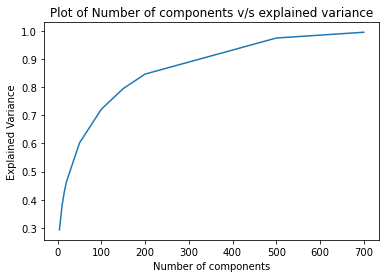

In [39]:
# Program to find the optimal number of components for Truncated SVD
n_comp = [4,10,15,20,50,100,150,200,500,700] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(lsa_words_text_embeddings.values)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

# Using the Semantic Representations in Analyses

Import packages needed for analysis

In [40]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
from scipy.stats import spearmanr
from numpy import mean, std

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import statistics
from numpy import arange

## Analysis using ridge multiple regression and PHQ classes as dependent variable 

**Mean Absolute Error (MAE):** $$MAE = \frac{1}{n}\sum^n_{i=1}|y_i-\hat{y_i}|$$
**Mean Squared Error (MSE):** $$MSE = \frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2$$
**Root Mean Squared Error (RMSE):** = $$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2}$$

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

#### Name of embedding df: 
bert_words_text_embeddings <br>
lsa_words_text_embeddings <br><br>
bert_text_embeddings <br> 
lsa_text_embeddings <br> <br>
bert_words_embeddings <br> 
lsa_words_embeddings

In [60]:
X_train, X_test, y_train, y_test = reduce_dim_pca(lsa_words_text_embeddings.values, k=50, split=True, sparse=True)

In [64]:
print(X_test.shape)
print(y_test.shape)
check_data_balance(y_test)

(196, 50)
(196,)


,count,prop
2,53,27.040816
0,52,26.530612
3,46,23.469388
1,45,22.959184


In [462]:
ridge_model = Ridge(alpha=.05).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [463]:
print("R2 score data:  ", ridge_model.score(X_test, y_test)) 
corr, _ = spearmanr(y_pred, y_test)
print('Spearmans correlation: ', corr)

print("MAE: ", mean_absolute_error(y_pred, y_test))
print("\nMSE: ", mean_squared_error(y_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score data:   0.4425054041140659
Spearmans correlation:  0.6218664479057153
MAE:  0.8592840339500867

MSE:  1.1193292171338816
RMSE: 1.0579835618448339


### With cross validation

In [110]:
cv = KFold(n_splits=10, shuffle=True)
ridge_model_CV = RidgeCV(alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], cv=cv).fit(X_train, y_train)
y_predCV = ridge_model_CV.predict(X_test)

print('Alpha: ', ridge_model_CV.alpha_)
print("R2 score data:  ", ridge_model_CV.score(X_test, y_test)) 
corr, _ = spearmanr(y_predCV, y_test)
print('Spearmans correlation: ', corr)
print("MAE: ", mean_absolute_error(y_predCV, y_test))

Alpha:  1.0
R2 score data:   0.2918336681794247
Spearmans correlation:  0.507612170251977
MAE:  0.7555202822098696


# Results table Ridge Regression w/ dependent variable GAD classes 

|           | Embedding     | Dim reduction |  Alpha  |  Spearmans  |   R2  |  MAE  |
| :-------- | :------------:|:-------------:|: ------:|:-----------:|:-----:|:-----:|
| **Words + Text** | LSA           | PCA    |    1.0  | 0.296       | 0.111 | 0.900 |
| **Words + Text** | LSA           | UMAP   |  .001   | 0.349       | 0.086 | 0.871 |
| **Words + Text** | LSA           | SVD    |  1.0    | 0.272       | 0.103 | 0.907 |
| **Words + Text** | BERT          | PCA    |   1.0   |    0.648    |  0.420| 0.676 |
| **Words + Text** | BERT          | UMAP   |  .01    | 0.487       | 0.268 | 0.793 |
| **Words + Text** | BERT          | SVD    |  1.0    | 0.599       | 0.378 | 0.700 |
| | | | | |
| | | | | |
| **Words**        | LSA           | PCA    | 1.0   | 0.215 | 0.114 | 0.856 |
| **Words**        | LSA           | UMAP   |  .001 | 0.563 | 0.329 | 0.719 |
| **Words**        | LSA           | SVD    |  1.0  | 0.216 | 0.114 | 0.858 |
| **Words**        | BERT          | PCA    |  1.0  | 0.622 | 0.403 | 0.695 |
| **Words**        | BERT          | UMAP   |  .005 | 0.491 | 0.240 | 0.795 |
| **Words**        | BERT          | PCA    |  1.0  | 0.620 | 0.400 | 0.698 |
| | | | | |
| | | | | |
|**Text**          | LSA           | PCA     | 1.0  | 0.191 | 0.017 | 0.971 |
|**Text**          | LSA           | UMAP    |  .001| 0.185 | 0.002| 0.940|
|**Text**          | LSA           | SVD     | 1.0  | 0.199 | 0.023 | 0.966 |
|**Text**          | BERT          | PCA     |  1.0 | 0.508 | 0.291 | 0.756 |
|**Text**          | BERT          | UMAP    |  .05 | 0.368 | 0.117 | 0.859|
|**Text**          | BERT          | SVD     | 1.0  | 0.516 | 0.300 | 0.752 |


## Analysis using Multilayer Perceptron Neural Network for multi-class classification

In [65]:
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu')) #60,25, 10
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_15 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 208       
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                

In [66]:
history = model.fit(X_train, y_train, batch_size=30, epochs=150, verbose=0, validation_data=(X_test, y_test))

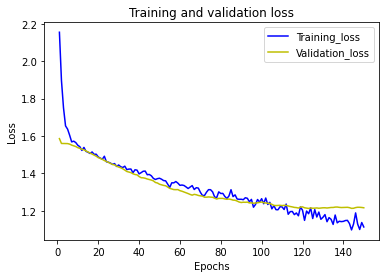

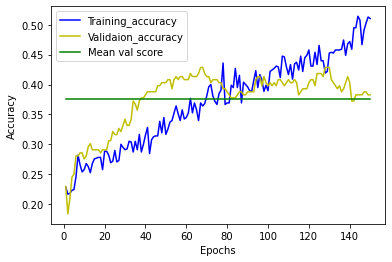

In [67]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 151)
plt.plot(epochs, loss, 'b', label='Training_loss')
plt.plot(epochs, val_loss, 'y', label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'y', label='Validaion_accuracy')
plt.plot(epochs, [statistics.mean(val_acc)]*len(epochs), 'g', label='Mean val score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
y_pred_check = np.argmax(model.predict(X_test),axis=1)
sc, _ = spearmanr(y_pred_check, y_test)

print('Embedding with bert_words_anx')
print('Spearmans correlation: ', sc)
print(classification_report(y_test, y_pred_check))

Embedding with bert_words_anx
Spearmans correlation:  0.39553824910369073
              precision    recall  f1-score   support

           0       0.68      0.44      0.53        52
           1       0.27      0.18      0.21        45
           2       0.34      0.64      0.45        53
           3       0.39      0.28      0.33        46

    accuracy                           0.40       196
   macro avg       0.42      0.39      0.38       196
weighted avg       0.43      0.40      0.39       196



# Testing

In [28]:
from keybert import KeyBERT
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

'Over the past two weeks, I have not been depressed.  I have been interested in things as much as I normally have been.  I have been in a good mood and I have been motivated to do things.  I have been engaged in my normal activities and my sleep has been pretty good.'

In [31]:
tst = responses['Deptext'][1]
print(tst)
kw_model.extract_keywords(tst)

I don't think I have felt depressed. I'm not familiar with the feelings of depression. Worry, yes, anxiety, joylesssness - something my former husband always accused me of and he may be right ... I do find it hard to get pleasure out of things but I feel connected with other people and the world so I don't think I could count as depressed


[('depressed', 0.314),
 ('anxiety', 0.2829),
 ('depression', 0.2795),
 ('husband', 0.2404),
 ('joylesssness', 0.2334)]

# Baseline

In [120]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [165]:
#Stratified generates random predictions by respecting the training set class distribution.
dummy_model = DummyClassifier(strategy='stratified', random_state=0)

X_dummy = lsa_words_text_embeddings.values

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = split_train_test(X_dummy, responses['GAD_class'])

dummy_model.fit(X_train_dummy, y_train_dummy)
y_pred_dummy = dummy_model.predict(X_test_dummy) 


sc_dummy, _ = spearmanr(y_pred_dummy, y_test_dummy)

print('Dummy predictions:')
print('Spearmans correlation: ', sc_dummy)
print(classification_report(y_test_dummy, y_pred_dummy))

Dummy predictions:
Spearmans correlation:  -0.02060074303197888
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        52
           1       0.35      0.36      0.35        45
           2       0.29      0.33      0.31        52
           3       0.28      0.28      0.28        43

    accuracy                           0.29       192
   macro avg       0.29      0.29      0.29       192
weighted avg       0.29      0.29      0.29       192



In [121]:
dummy_regr = DummyRegressor(strategy="mean")

X_dummy = bert_words_text_embeddings.values
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = split_train_test(X_dummy, responses['GAD_class'])

dummy_regr.fit(X_train_dummy, y_train_dummy)
y_pred_dummy = dummy_regr.predict(X_test_dummy) 

print(y_pred_dummy)

sc_dummy, _ = spearmanr(y_pred_dummy, y_test_dummy)

print('Spearmans correlation: ', sc_dummy)
print("R2 score data:  ", dummy_regr.score(X_test_dummy, y_test_dummy)) 
print("MAE: ", mean_absolute_error(y_pred_dummy, y_test_dummy))

[1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848
 1.45418848 1.45418848 1.45418848 1.45418848 1.45418848 1.4541